In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [11]:
df.shape

(200, 5)

# Capping

<AxesSubplot:xlabel='Annual_Income_(k$)'>

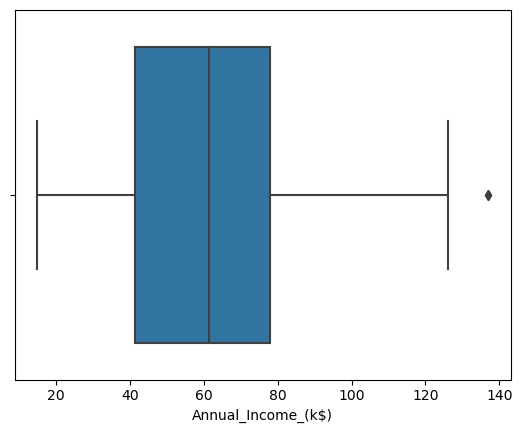

In [14]:
sns.boxplot(df['Annual_Income_(k$)'])

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Density'>

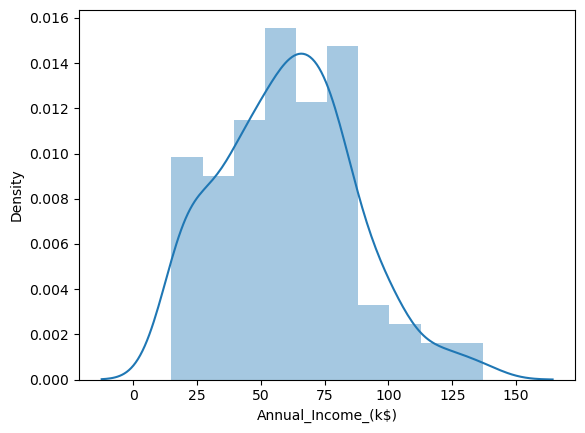

In [18]:
sns.distplot(df['Annual_Income_(k$)'])

In [20]:
upper_limit=df['Annual_Income_(k$)'].quantile(0.99)
upper_limit

126.1099999999999

In [21]:
lower_limit=df['Annual_Income_(k$)'].quantile(0.01)
lower_limit

15.99

In [23]:
df[(df['Annual_Income_(k$)']>=126.109) | (df['Annual_Income_(k$)']<=15.99)]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
198,199,Male,32,137,18
199,200,Male,30,137,83


In [27]:
new_df=df[(df['Annual_Income_(k$)']<=126.109) & (df['Annual_Income_(k$)']>=15.99)]
new_df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [29]:
df['Annual_Income_(k$)'].describe(), new_df['Annual_Income_(k$)'].describe()

(count    200.000000
 mean      60.560000
 std       26.264721
 min       15.000000
 25%       41.500000
 50%       61.500000
 75%       78.000000
 max      137.000000
 Name: Annual_Income_(k$), dtype: float64,
 count    196.000000
 mean      60.244898
 std       24.953315
 min       16.000000
 25%       42.000000
 50%       61.500000
 75%       78.000000
 max      126.000000
 Name: Annual_Income_(k$), dtype: float64)

<AxesSubplot:xlabel='Annual_Income_(k$)'>

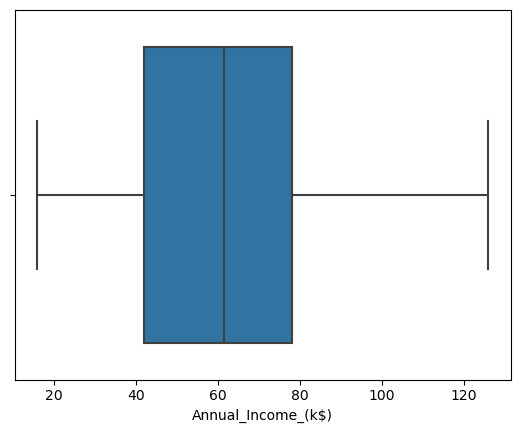

In [31]:
 sns.boxplot(new_df['Annual_Income_(k$)'])

In [34]:
#capping --> Winsorization
np.where(df['Annual_Income_(k$)']>=upper_limit,
        upper_limit,
         np.where(df['Annual_Income_(k$)']<=lower_limit,
         lower_limit,
         df['Annual_Income_(k$)']
        ))

array([ 15.99,  15.99,  16.  ,  16.  ,  17.  ,  17.  ,  18.  ,  18.  ,
        19.  ,  19.  ,  19.  ,  19.  ,  20.  ,  20.  ,  20.  ,  20.  ,
        21.  ,  21.  ,  23.  ,  23.  ,  24.  ,  24.  ,  25.  ,  25.  ,
        28.  ,  28.  ,  28.  ,  28.  ,  29.  ,  29.  ,  30.  ,  30.  ,
        33.  ,  33.  ,  33.  ,  33.  ,  34.  ,  34.  ,  37.  ,  37.  ,
        38.  ,  38.  ,  39.  ,  39.  ,  39.  ,  39.  ,  40.  ,  40.  ,
        40.  ,  40.  ,  42.  ,  42.  ,  43.  ,  43.  ,  43.  ,  43.  ,
        44.  ,  44.  ,  46.  ,  46.  ,  46.  ,  46.  ,  47.  ,  47.  ,
        48.  ,  48.  ,  48.  ,  48.  ,  48.  ,  48.  ,  49.  ,  49.  ,
        50.  ,  50.  ,  54.  ,  54.  ,  54.  ,  54.  ,  54.  ,  54.  ,
        54.  ,  54.  ,  54.  ,  54.  ,  54.  ,  54.  ,  57.  ,  57.  ,
        58.  ,  58.  ,  59.  ,  59.  ,  60.  ,  60.  ,  60.  ,  60.  ,
        60.  ,  60.  ,  61.  ,  61.  ,  62.  ,  62.  ,  62.  ,  62.  ,
        62.  ,  62.  ,  63.  ,  63.  ,  63.  ,  63.  ,  63.  ,  63.  ,
      